In [29]:
import numpy as np
np.random.seed(2023 - 7 - 4)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (t, norm)

# ___Testing a Population Mean Difference___
---------------

In [2]:
# We'll be looking at paired data, where we'll have a set of features and records for each feature for both the columns (or variables)

cpw = pd.read_csv("./../data/children_per_woman_total_fertility.csv")
cpw.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


In [3]:
np.where(cpw.country == "Pakistan")

(array([140], dtype=int64),)

In [4]:
afghanistan = cpw.iloc[1, 1:]
pakistan = cpw.iloc[140, 1:]

In [5]:
# The data we are interested in is the average number of children per women in Pakistan and Afghanistan over the 300 years window of 1800 - 2100
# Some of them may be predicted data :&(

afghanistan.mean(), pakistan.mean()

(5.7414285714285755, 5.189036544850493)

In [6]:
afghanistan.mean() - pakistan.mean()

0.5523920265780822

In [7]:
# We have the average number of children per women data for each year, starting from 1800 to 2100.

(afghanistan - pakistan).mean()

0.5523920265780723

In [8]:
# We have two samples of 300 size,
# We'll define the difference as Afghanistan - Pakistan.

# The question here is that is there a significant difference between the average number of children per women between the two countries?
# In other words;

# @ 5% significance level;

# Null hypothesis: There's no significant difference between the average number of children per women between the two countries.
# Alternative hypothesis: There's a significant difference between the average number of children per women between the two countries. (two tailed)

## ___$H_0: \bar{CPW_{Afg}} - \bar{CPW_{Pak}} = 0$___
## ___$H_1: \bar{CPW_{Afg}} - \bar{CPW_{Pak}} \neq 0$___

In [9]:
# We have records for only 300 years.
# We have to use them to estimate the population mean difference!

# Our best estimate is the difference between the sample means! (or the mean of year-wise differences in the sample)

best_est = (afghanistan - pakistan).mean()
best_est

0.5523920265780723

In [10]:
# Test score = (best estimate - hypothesized estimate) / standard error
# Since we do not know the population's standard error, we'll calculate the samples' difference's standard error,

stderr = (afghanistan - pakistan).std() / np.sqrt(afghanistan.size)    # afghanistan.size = pakistan.size, so we could use either one of them.
stderr

0.03683155481555702

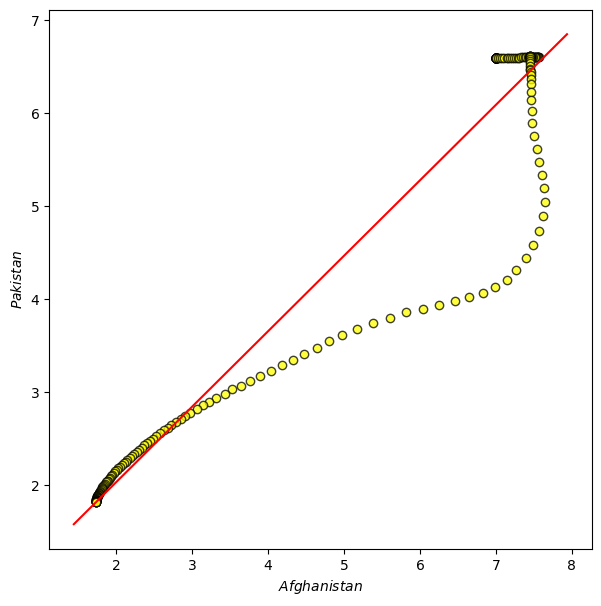

In [11]:
# To see the differences in a scatter plot,

fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.scatter(afghanistan, pakistan, color = "yellow", edgecolor = "black", alpha = 0.75)
axes.plot(axes.get_xbound(), axes.get_ybound(), color = "red")
axes.set_xlabel("$Afghanistan$")
axes.set_ylabel("$Pakistan$")
plt.show()

In [12]:
# Assumptions: 

# 1) Our samples are simple random samples.
# 2) Samples are large enough.

In [13]:
# Is our sample of differences normally distributed?

x = np.linspace(0, 1, num = 50, endpoint = True)
qnorm = norm.ppf(x)
qtest = np.quantile(a = afghanistan - pakistan, q = x)

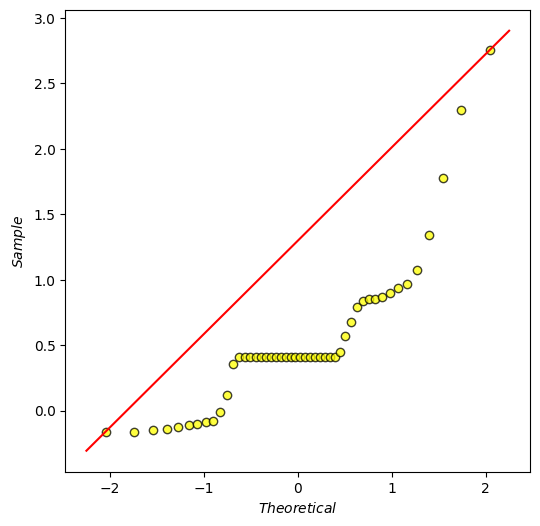

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.scatter(qnorm, qtest, color = "yellow", edgecolor = "black", alpha = 0.75)
axes.plot(axes.get_xbound(), axes.get_ybound(), color = "red")
axes.set_xlabel("$Theoretical$")
axes.set_ylabel("$Sample$")
plt.show()

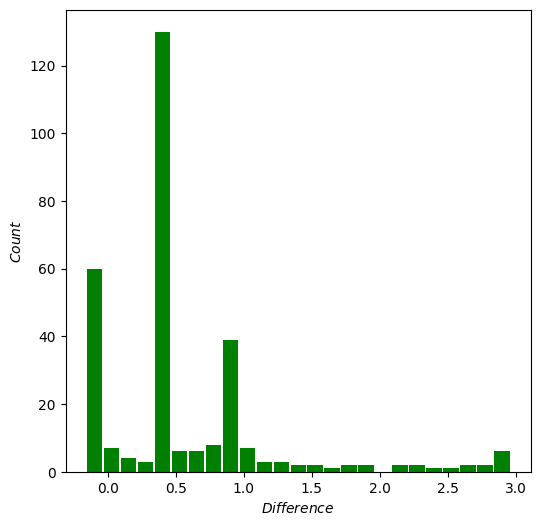

In [15]:
# The distribution is NOT NORMAL AT ALL.

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.hist(afghanistan - pakistan, bins = 25, color = "green", rwidth = 0.9)
axes.set_xlabel("$Difference$")
axes.set_ylabel("$Count$")
plt.show()

In [16]:
diff = afghanistan - pakistan

diff.min(), diff.max(), diff.median(), diff.mean(), diff.std()

(-0.16000000000000014,
 2.96,
 0.41000000000000014,
 0.5523920265780723,
 0.6390035934715437)

In [17]:
# Test statistic

tscore = (best_est - 0) / stderr
tscore

14.997792771559872

In [18]:
# The probability of a random normal value being less than or equal to the given t score is;
# That's our p value,

1 - t.cdf(tscore, df = diff.size - 1)

0.0

In [19]:
# Here, the t test is a two tailed t test, the direction of deviation does not matter.
# What that means is, we need to consider the area on the left of -t and the area on the right of t.
# This area does not cover at least a fraction of our curve.

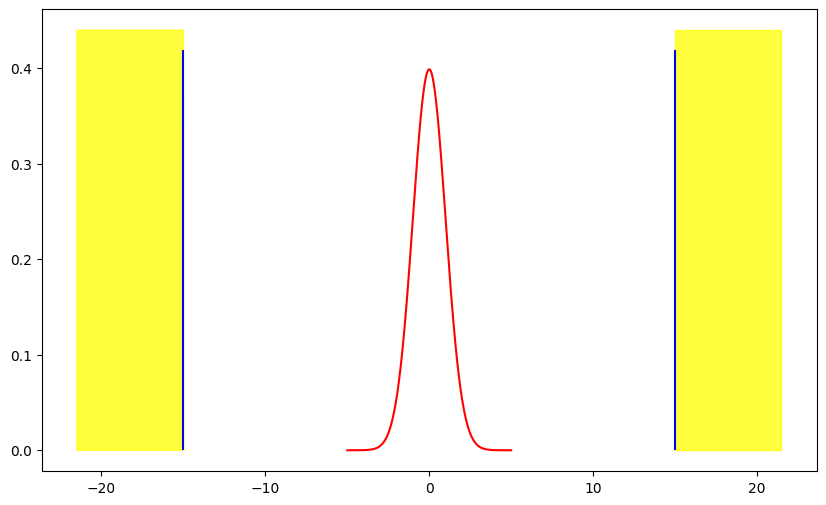

In [20]:
x = np.linspace(start = -5, stop = 5, num = 1000, endpoint = True)
tvals = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
fig.set_size_inches(10, 6)
axes.plot(x, tvals, color = "red")
axes.vlines(x = [-tscore, tscore], ymin = 0, ymax = max(axes.get_ybound()), color = "blue")
span = np.linspace(axes.get_xbound()[0] - 5, axes.get_xbound()[1] + 5, num = 2000)
axes.fill_between(x = span, y1 = 0, y2 = max(axes.get_ybound()), where = (span >= tscore) | (span <= -tscore),
                   color = "yellow", alpha = 0.75, interpolate = True)
plt.show()

In [21]:
(1 - t.cdf(2.72, df = 19)) * 2

0.01358950670585024

## ___Cabinet Example___
----------------

In [78]:
# Let's say that there are two cabinet vendors.
# They proposed tenders to supply a set of different cabinet types, that are needed by a company.
# We need to decide whether there's a significant difference between the quotes provided by the two companies.

furniture = ["Countertop", "Chabudai", "Changing table", "Desk", "Computer desk", "Davenport desk", "Drawing board", "Writing desk", "Pedestal desk",
"Kneehole desk", "Secretary desk", "Dressing table", "Lowboy", "Kotatsu", "Korsi", "Monks bench", "Soban", "Table", "Coffee table", "Dining table",
"Drop-leaf table", "End table", "Folding table", "Game table", "Gateleg table", "Poker table", "Refectory table", "Trestle table", "TV tray table",
"Wine table", "Sewing table", "Washstand", "Workbench", "Storage", "Baker's rack", "Bookcase", "Cabinetry", "Bathroom cabinet", "Chifforobe",
"Closet", "Credenza", "Cupboard", "Curio cabinet", "Gun cabinet", "Hutch", "Hoosier cabinet", "Kitchen cabinet", "Liquor cabinet", "Pantry",
"Pie safe", "Stipo a bambocci", "Sideboard", "Chest of drawers or dresser", "Chest", "Cellarette", "Hope chest", "Coat rack", "A coat rack",
"Drawer (furniture)", "Hall tree", "Hatstand", "Bar cabinet", "Filing cabinet", "Floating shelf", "Nightstand", "Ottoman", "Plan chest", 
"Plant stand", "Shelving", "Sideboard or buffet", "Umbrella stand", "An umbrella stand", "Wardrobe or armoire", "Wine rack", "Commode",
"Sets", "A bedroom set", "Bedroom set (group)", "Dinette (group)", "Dining set", "Vanity set", "Portable Lamps", "Patio set"]

In [79]:
len(furniture)

83

In [80]:
vendor_a = np.random.randint(low = 45, high = 4531, size = len(furniture))
vendor_b = np.random.randint(low = 45, high = 4531, size = len(furniture))

In [81]:
items = pd.DataFrame({"Item": furniture, "VendorA": vendor_a, "VendorB": vendor_b})
items.head()

,Item,VendorA,VendorB
0,Countertop,4252,3065
1,Chabudai,4425,879
2,Changing table,2560,188
3,Desk,2546,4186
4,Computer desk,195,4266


In [82]:
price_diff = items.VendorA - items.VendorB
price_diff

0     1187
1     3546
2     2372
3    -1640
4    -4071
      ... 
78   -3742
79     469
80    2030
81   -1670
82   -2594
Length: 83, dtype: int32

In [83]:
# Null hypothesis: There's no significant difference between the price propositions by the two vendors. (for the population)
# i.e mean(diff) = 0

# Alternative hypothesis: There's a significant difference between the price propositions by the two vendors. (for the population)
# i.e mean(diff) != 0

In [84]:
price_diff.mean()

92.02409638554217

In [85]:
# Our best estimate is the sample mean,

best_est = price_diff.mean()

In [86]:
# Estimated sample standard error, to be used in place of population standard error,

stderr = price_diff.std() / np.sqrt(price_diff.size)
stderr

227.8321386238599

In [87]:
# Test statistic,

tstat = (best_est - 0) / stderr
tstat

0.4039118314974412

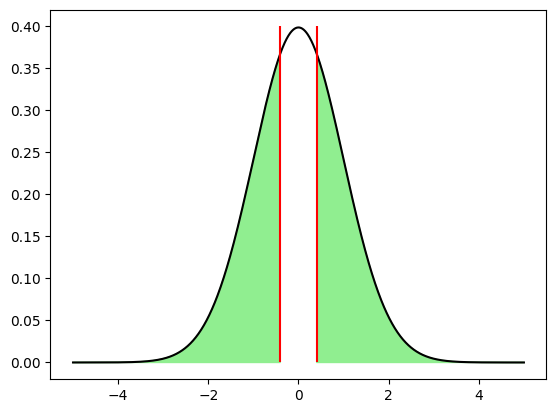

In [88]:
# Since our test was two tailed, we do not consider the direction.

x = np.linspace(-5, 5, num = 1000)
tscores = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
axes.plot(x, tscores, color = "black")

# We'll take the areas fenced by the positive and negative values of the t score!

axes.vlines(x = [-tstat, tstat], ymin = 0, ymax = 0.4, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = tscores, where = (x <= -tstat) | (x >= tstat), color = "lightgreen")
plt.show()

In [89]:
tstat

0.4039118314974412

In [90]:
# The area on the left of line x = tstat

t.cdf(tstat, df = price_diff.size - 1)

0.6563354908736301

In [91]:
# We need the area in green!
# Area on the right of x = tstat is,

1 - t.cdf(tstat, df = price_diff.size - 1)

0.3436645091263699

In [92]:
# Since, this is a two tailed t test,

p = 2 * (1 - t.cdf(tstat, df = price_diff.size - 1))
p

0.6873290182527398

In [93]:
# Our p value is very large compared to the predetermined alpha value. (0.05)
# So, we cannot reject the Null hypothesis.
# There's no significant difference between the quotes proposals by the two vendors.

In [64]:
# Confidence intervals =>
# Consider a 95% confidence interval,

# confidence interval = best estimate +- margin of error
# best estimate = sample mean

price_diff.mean()

54.433734939759034

In [65]:
# Margin of error = multiplier * standard error
# For means, t statistic.

In [68]:
# For a 95% confidence level, 

0.95 + ((1 - 0.95) / 2)

0.975

In [74]:
# t multiplier is,

tstar = t.ppf(0.975, df = price_diff.size - 1)
tstar

1.9893185569368186

In [75]:
stderr = price_diff.mean() / np.sqrt(price_diff.size)
stderr

5.974878634137602

In [76]:
moerr = tstar * stderr
moerr

11.885936942335245

In [77]:
# 95% confidence interval,

best_est - moerr, best_est + moerr

(42.547797997423785, 66.31967188209428)